When planning the vocation trip, budget probably is the first thing that pops up in mind. Who does not want to enjoy the getaway that maximize the value of every penny spent! Normally transportation, lodging and food cost are the three major parts in travel expenses, in which study shows the lodging expense takes up 26% of the total travel cost. So you won’t miss any opportunity to save money in lodging but how? Fortunately there are public data from Airbnb which operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Let’s dive into Airbnb Listing data in Seattle to find answers to these questions:

- What are the busiest times of the year to visit Seattle in cost perspective?
- Which neighbourhood in Seattle is the most popular place for lodging?
- Should tourist choose listings with longer business history or shorter?

First, let's read in the data and necessary libraries. The following Airbnb activity is included in this Seattle dataset:
-Listings, including full descriptions and average review score.
-Reviews, including unique id for each reviewer and detailed comments.
-Calendar, including listing id and the price and availability for that day.

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Read in Calendar CSV and have the initial look at the data.

In [90]:
df1 = pd.read_csv('C:\\Users\\liang\Documents\\Udacity Data Scientist\\Introduction to Data Science\\Project\\calendar.csv')
df1.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [92]:
#create a user defined 'price string to numerical' function
def price_str_to_num(df,col='price'):
    df[col] = df[col].str.replace('$', '', regex=True).replace(',', '', regex=True).astype(float)
    return df

In [93]:
#apply the 'price string to numerical' function to df1 (calendar dataframe)
df_1 = price_str_to_num(df1,col='price')

In [94]:
df_1.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [95]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   listing_id  1393570 non-null  int64  
 1   date        1393570 non-null  object 
 2   available   1393570 non-null  object 
 3   price       934542 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 42.5+ MB


Read in Listings CSV and have the initial look at the data.

In [96]:
df2 = pd.read_csv('C:\\Users\\liang\Documents\\Udacity Data Scientist\\Introduction to Data Science\\Project\\listings.csv')
df2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [98]:
#create the 'get null column' function
def get_null_column(df):
    null_col = []
    for col in df.columns:
        if df[col].isnull().sum() != 0:
            null_col.append(col)
    return null_col


In [99]:
#apply the 'get null column' function to df2 (listings dataframe) to get the columns that have null values
null_col_calendar = get_null_column(df2)
len(null_col_calendar)

45

Read in Reviews CSV and have the initial look at the data.

In [100]:
df3 = pd.read_csv('C:\\Users\\liang\Documents\\Udacity Data Scientist\\Introduction to Data Science\\Project\\reviews.csv')
df3.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [101]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


Question 1: What are the busiest times of the year to visit Seattle in cost perspective?

Use the calendar dataframe for data analysis.
Preprocessing the dataframe to extract month, week, and day of week from the 'date' column, 
and create columns to store those information for future analysis.

In [102]:
# Extract year, month, day of the week from date column
df_1['Year'] = pd.DatetimeIndex(df_1['date']).year
df_1['Month'] = pd.DatetimeIndex(df_1['date']).month
df_1['Week'] = pd.DatetimeIndex(df_1['date']).week
df_1['date'] = pd.to_datetime(df_1['date'])

C:\Users\liang\AppData\Local\Temp\ipykernel_77096\4069155982.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_1['Week'] = pd.DatetimeIndex(df_1['date']).week


In [103]:
#The day of the week with Monday=0, Sunday=6.
df_1['Day of Week'] = df_1['date'].apply(lambda time: time.dayofweek)
df_1

,listing_id,date,available,price,Year,Month,Week,Day of Week
0,241032,2016-01-04,t,85.0,2016,1,1,0
1,241032,2016-01-05,t,85.0,2016,1,1,1
2,241032,2016-01-06,f,NaN,2016,1,1,2
3,241032,2016-01-07,f,NaN,2016,1,1,3
4,241032,2016-01-08,f,NaN,2016,1,1,4
...,...,...,...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,2016,12,52,3
1393566,10208623,2016-12-30,f,NaN,2016,12,52,4
1393567,10208623,2016-12-31,f,NaN,2016,12,52,5
1393568,10208623,2017-01-01,f,NaN,2017,1,52,6


The Calendar csv file has detailed price log over the time of 365 days from January 2016 to January 2017, which is ideal for the price trending analysis. However there are tons of missing price values in the dataset. The reason for that is when the listing was booked that night, there was no available price showing for online ordering. Only available listings were showing the price. That brings up the question how to treat the missing price values?
One way to get rid of the missing values would be to replace null values with an critical value: either the mean value, or zero value, or the mode value. Whichever value that is chosen that would definitely bring bias to the price trend. Since we are focusing the price trend over the month and the price is the average price over 3818 listings, it is reasonable we just utilize the tons of valid price data we have to do the analysis. So we drop all rows that have null price data, and aggregate them for analysis.

In [104]:
#remove null price rows
df1_price = df1.dropna(subset=['price'], axis=0)
df1_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   listing_id   934542 non-null  int64         
 1   date         934542 non-null  datetime64[ns]
 2   available    934542 non-null  object        
 3   price        934542 non-null  float64       
 4   Year         934542 non-null  int64         
 5   Month        934542 non-null  int64         
 6   Week         934542 non-null  int64         
 7   Day of Week  934542 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 64.2+ MB


1. Explore monthly price patterns

In [105]:
#statstics of price per month based on all no null price rows
df1_price_month = df1_price.groupby('Month')['price'].mean().reset_index()

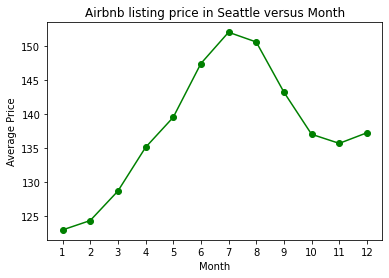

In [106]:
#generating the overall trend for price versus month
fig,ax = plt.subplots()
x=df1_price_month['Month']
y=df1_price_month['price']
xticks=df1_price_month['Month']
ax.plot(x,y,marker='o', color='g')
plt.xticks(xticks)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Airbnb listing price in Seattle versus Month')
plt.savefig('Airbnb listing price in Seattle versus Month.png')
plt.show()

The plot clearly shows an uptrend in from January to July, followed by a downtrend after peaked at July. 
Overall it is a uptrend throught the year as December's average price is higher than January's.

2. Explore weekly price patterns

In [107]:
#statstics of price per each day of week based on all no null price rows
df1_price_dayofweek= df1_price.groupby('Day of Week')['price'].mean().reset_index()

C:\Users\liang\AppData\Local\Temp\ipykernel_77096\2820828525.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_label)


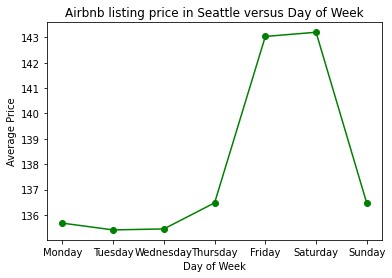

In [108]:
#generating the overall trend for price versus day of week(The day of the week with Monday=0, Sunday=6.)
fig,ax = plt.subplots()
x=df1_price_dayofweek['Day of Week']
y=df1_price_dayofweek['price']
xticks=df1_price_dayofweek['Day of Week']
xticks_label=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.plot(x,y,marker='o', color='g')
ax.set_xticklabels(xticks_label)
plt.xticks(xticks)
plt.xlabel('Day of Week')
plt.ylabel('Average Price')
plt.title('Airbnb listing price in Seattle versus Day of Week')
plt.savefig('Airbnb listing price in Seattle versus Day of Week.png')
plt.show()

As seen from the plot, Fridays and Saturdays are the most expensive days in a week.

3. Explore the busiest season in Seattle from the perspective of the room availabilities.

In [109]:
#statistics of booked days per year for each listing
df_1['Booking Status'] = np.where(df_1['available']=='t', 'Open', 'Full') 
df1_popularity = df_1.groupby('listing_id')['Booking Status'].value_counts().unstack().reset_index()
df1_popularity = df1_popularity.fillna(0)
df1_popularity = df1_popularity.sort_values('Full')
df1_popularity

Booking Status,listing_id,Full,Open
1041,3528627,0.0,365.0
2624,7651148,0.0,365.0
2619,7646637,0.0,365.0
464,1246809,0.0,365.0
2612,7634011,0.0,365.0
...,...,...,...
307,777159,365.0,0.0
1736,5489676,365.0,0.0
1131,3773700,365.0,0.0
1418,4507137,365.0,0.0


In [110]:
#statistics of busy season for overall listing
df1_availability_statistics = df_1.groupby(['Year', 'Month'])['Booking Status'].value_counts().unstack().reset_index()
df1_availability_statistics

Booking Status,Year,Month,Full,Open
0,2016,1,47665,59239
1,2016,2,37401,73321
2,2016,3,34420,83938
3,2016,4,38503,76037
4,2016,5,38387,79971
5,2016,6,37296,77244
6,2016,7,44136,74222
7,2016,8,42011,76347
8,2016,9,37294,77246
9,2016,10,35920,82438


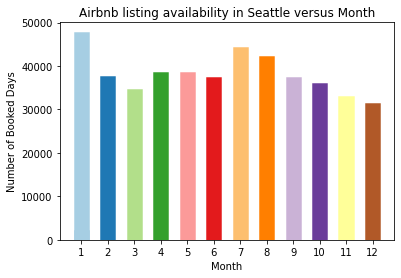

In [111]:
col_map = plt.get_cmap('Paired')
month = df1_availability_statistics['Month']
listing = df1_availability_statistics['Full']
xticks=df1_price_month['Month']
# Creating a bar chart with bars of different color using colormap
plt.bar(month, listing, width=0.5, color=col_map.colors, edgecolor=col_map.colors, linewidth=2.5)
plt.xticks(xticks)
plt.title('Airbnb listing availability in Seattle versus Month')
plt.xlabel('Month')
plt.ylabel('Number of Booked Days')
plt.savefig('Airbnb listing booked days in Seattle versus Month.png')
plt.show()


The chart shows July and August are the hot months for Airbnb business hosts. But to some surprise, January wins the Top spot in the chart. 

Quewstion 2: Which neighbourhood in Seattle is the most popular place for lodging?

Use the dataframe 2(Listings CSV) explore what data would tell us about the popular neighbourhoods on Airbnb.

In [112]:
#check if any missing value in 'neighbourhood_group_cleansed' column
df2['neighbourhood_group_cleansed'].isnull().sum()

0

1. Explore the listing inventory per neighbourhood group

In [113]:
#create a new dataframe
df_2 = df2.copy()

In [114]:
#explore the number of Airbnb listing per neighbourhood
df2_listings_per_neighbourhood = df_2.groupby('neighbourhood_group_cleansed')['id'].count().reset_index()
#rename the aggregated column 
df2_listings_per_neighbourhood  = df2_listings_per_neighbourhood .rename(columns={'id':'Number of Listing'})
df2_listings_per_neighbourhood 

,neighbourhood_group_cleansed,Number of Listing
0,Ballard,230
1,Beacon Hill,118
2,Capitol Hill,567
3,Cascade,89
4,Central Area,369
5,Delridge,79
6,Downtown,530
7,Interbay,11
8,Lake City,67
9,Magnolia,61


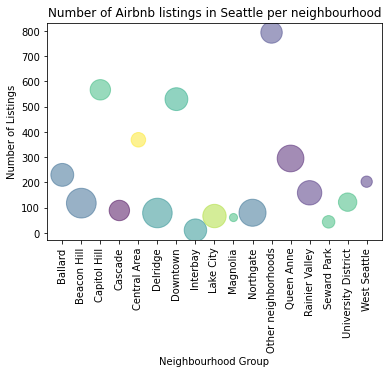

In [115]:
N = df2_listings_per_neighbourhood.shape[0]
x = df2_listings_per_neighbourhood['neighbourhood_group_cleansed']
y = df2_listings_per_neighbourhood['Number of Listing']
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  
# Creating a bar chart with bars of different color using colormap
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.xticks(rotation = 90)
plt.title('Number of Airbnb listings in Seattle per neighbourhood')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.savefig('Number of Airbnb listings in Seattle per neighbourhood.png', bbox_inches='tight')
plt.show()

The inventory champion goes to Capitol Hill neighbourhood group, close to 600 listings. The second place is the Downtown Seattle area which are not far behind Capitol Hill.

2. Explore average booked days per 365 day for each neighbourhood

In [116]:
#explore the popular neighbourhood
df_popular_neighbourhood = df_1.groupby(['listing_id'])['Booking Status'].value_counts().unstack().reset_index()
#join three dataframes
df_popular_neighbourhood = df_popular_neighbourhood.merge(df_2, left_on='listing_id', right_on='id', how='left')
df_popular_neighbourhood = df_popular_neighbourhood.groupby('neighbourhood_group_cleansed')['Full','Open'].sum().reset_index()
df_popular_neighbourhood = df_popular_neighbourhood.merge(df2_listings_per_neighbourhood , how='left')
#create new columns to calculated average booked/available days per 365 day for each neighbourhood
df_popular_neighbourhood['Average Booked Days per Listing'] = round(df_popular_neighbourhood['Full'] / df_popular_neighbourhood['Number of Listing'],0)
df_popular_neighbourhood['Average Available Days per Listing'] = round(df_popular_neighbourhood['Open'] / df_popular_neighbourhood['Number of Listing'],0)
df_popular_neighbourhood = df_popular_neighbourhood.rename(columns={'neighbourhood_group_cleansed':'Neighbourhood Group'})
df_popular_neighbourhood

C:\Users\liang\AppData\Local\Temp\ipykernel_77096\114522919.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_popular_neighbourhood = df_popular_neighbourhood.groupby('neighbourhood_group_cleansed')['Full','Open'].sum().reset_index()


,Neighbourhood Group,Full,Open,Number of Listing,Average Booked Days per Listing,Average Available Days per Listing
0,Ballard,25835.0,58115.0,230,112.0,253.0
1,Beacon Hill,12800.0,30270.0,118,108.0,257.0
2,Capitol Hill,74287.0,132668.0,567,131.0,234.0
3,Cascade,13768.0,18717.0,89,155.0,210.0
4,Central Area,44129.0,90556.0,369,120.0,245.0
5,Delridge,7290.0,21545.0,79,92.0,273.0
6,Downtown,67725.0,125725.0,530,128.0,237.0
7,Interbay,621.0,3394.0,11,56.0,309.0
8,Lake City,5654.0,18801.0,67,84.0,281.0
9,Magnolia,5017.0,17248.0,61,82.0,283.0


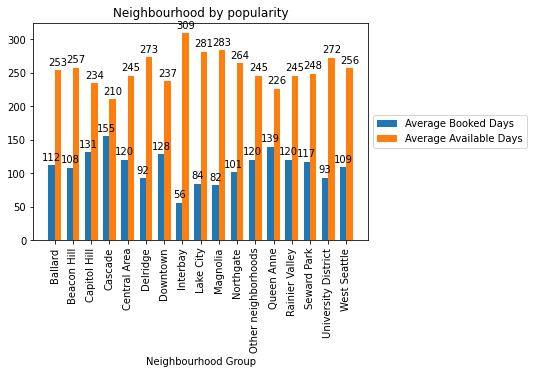

In [117]:
labels = df_popular_neighbourhood['Neighbourhood Group']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
Booked_days = df_popular_neighbourhood['Average Booked Days per Listing'] 
Available_days = df_popular_neighbourhood['Average Available Days per Listing']

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Booked_days, width, label='Average Booked Days')
rects2 = ax.bar(x + width/2, Available_days, width, label='Average Available Days')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Neighbourhood Group')
ax.set_title('Neighbourhood by popularity')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)
plt.savefig('Neighbourhood by popularity.png', bbox_inches='tight')
plt.show()

This time the champion of most booked days goes to the Cascade neighbourhood and Queen Anne is the second. Notably that the Capitol Hill and the Downtown area are not performing bad, listed as the third and fourth place.

3. Explore average listing price per neighbourhood

In [118]:
#apply the 'price string to numerical' function to df2 (listing dataframe)
df_price = price_str_to_num(df2,col='price')
#aggregate the price column by neighbourhood group
df_price_neighbourhood = df_price.groupby('neighbourhood_group_cleansed')['price'].mean().reset_index()

In [119]:
#rename the column name
df_price_neighbourhood = df_price_neighbourhood.rename(columns={'neighbourhood_group_cleansed':'Neighbourhood Group'})
df_price_neighbourhood


,Neighbourhood Group,price
0,Ballard,124.682609
1,Beacon Hill,94.669492
2,Capitol Hill,130.592593
3,Cascade,140.101124
4,Central Area,128.338753
5,Delridge,83.278481
6,Downtown,154.405660
7,Interbay,109.727273
8,Lake City,92.671642
9,Magnolia,177.672131


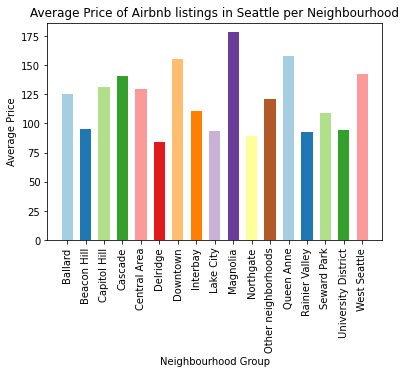

In [120]:
col_map = plt.get_cmap('Paired')
neighbourhood = df_price_neighbourhood['Neighbourhood Group']
price = df_price_neighbourhood['price']

# Creating a bar chart with bars of different color using colormap
plt.bar(neighbourhood, price, width=0.5, color=col_map.colors, edgecolor=col_map.colors, 
        linewidth=2)

plt.title('Average Price of Airbnb listings in Seattle per Neighbourhood')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation = 90)
plt.savefig('Average Price of Airbnb listings in Seattle per Neighbourhood.png', bbox_inches='tight')
plt.show()

The name that catches our eyes is the Magnolia neighbourhood which is one the neighbourhood groups that have the fewest Airbnb listings in Seattle Area. The Downtown area and the Queen Anne neighbourhood have the second and third place on the price ranking.
The Capitol Hill neighbourhood has a more affordable price comparing to the previously mentioned neighbourhood groups.

Question 3: Should tourist choose listings with longer business history or shorter?

Use the dataframe 2(Listings CSV) which has the business history information that is perfect for pattern analysis in the section. 

In [121]:
df2['host_since'].isnull().sum()

2

There are two rows that are having null value for the business starting year. 
Since this number is very small comparing to total 3818 rows, it is decided to drop rows with null host since values.

In [141]:
#Remove null values in 'host_since' column
df_3 = df2.copy()
df_3 = df_3.dropna(subset=['host_since'])
df_3['host_since'].isnull().sum()

0

1. Explore the distribution of new listings over the years

In [123]:
#extract business start year information from the 'host_since' column
df_3['Start Year'] = pd.DatetimeIndex(df_3['host_since']).year
#explore the new Airbnb listing per year
df2_newlisting_per_year = df_3.groupby('Start Year')['id'].count().reset_index()
df2_newlisting_per_year = df2_newlisting_per_year.rename(columns={'id':'Number of New Listing'})
df2_newlisting_per_year


,Start Year,Number of New Listing
0,2008,4
1,2009,64
2,2010,149
3,2011,398
4,2012,539
5,2013,776
6,2014,900
7,2015,981
8,2016,5


The table shows two outliers: 2008 and 2016. Considering Airbnb started around 2007, the business model was new in 2008 so very few started business in that year.
But for 2016, it is strange to see such a low level considering a high level of new listings in 2014 and 2015. I think maybe some information have not been updated or the record was incomplete at the time of data publishing.
So I would like to treat the data in 2016 as an outlier and drop it from analysis.

In [124]:
df2_newlisting_per_year = df2_newlisting_per_year.drop(index=8)
df2_newlisting_per_year

,Start Year,Number of New Listing
0,2008,4
1,2009,64
2,2010,149
3,2011,398
4,2012,539
5,2013,776
6,2014,900
7,2015,981


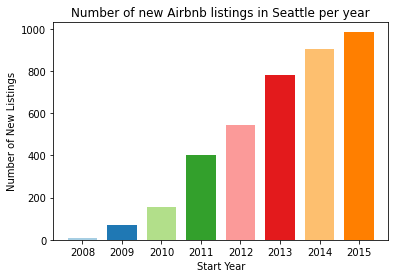

In [125]:
col_map = plt.get_cmap('Paired')
start_year = df2_newlisting_per_year['Start Year']
listing = df2_newlisting_per_year['Number of New Listing']
xticks=df2_newlisting_per_year['Start Year']
# Creating a bar chart with bars of different color using colormap
plt.bar(start_year, listing, width=0.7, color=col_map.colors, edgecolor=col_map.colors, linewidth=2)
plt.xticks(xticks)
plt.title('Number of new Airbnb listings in Seattle per year')
plt.xlabel('Start Year')
plt.ylabel('Number of New Listings')
plt.savefig('Number of new Airbnb listings in Seattle per year.png')
plt.show()


The chart shows there is a general uptrends of new listings over the recent years.

2. Explore the average review scores for listings over the business starting year

In [126]:
df_3['review_scores_rating'].isnull().sum()

645

Since we are focusing the general trend of the review socres over the month and we don't want to bring bias when impuriting the column. It is reasonable we just utilize the existing reivew score data to do the analysis. 
So we drop all rows that have null review score data, and aggregate them for analysis.

In [127]:
#Remove null values in 'review_scores_rating' column
df_4 = df_3.copy()
df_4 = df_4.dropna(subset=['review_scores_rating'])
df_4.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,Start Year
count,3.171000e+03,3.171000e+03,3.171000e+03,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3159.000000,3165.000000,...,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3171.000000,3171.000000,3171.000000
mean,5.017752e+06,2.016010e+13,1.437149e+07,6.933459,6.933459,47.628684,-122.332870,3.384421,1.258943,1.302686,...,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.990224,2.089722,2013.118259
std,2.801376e+06,0.000000e+00,1.343307e+07,25.541214,25.541214,0.042962,0.031571,1.991495,0.594381,0.874565,...,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.955426,1.822827,1.552311
min,4.291000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000,2008.000000
25%,2.694596e+06,2.016010e+13,3.074414e+06,1.000000,1.000000,47.608762,-122.353981,2.000000,1.000000,1.000000,...,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.705000,2012.000000
50%,5.289293e+06,2.016010e+13,9.469827e+06,1.000000,1.000000,47.623076,-122.328980,3.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.550000,2013.000000
75%,7.454547e+06,2.016010e+13,2.347934e+07,3.000000,3.000000,47.662419,-122.310570,4.000000,1.000000,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.010000,2014.000000
max,1.024814e+07,2.016010e+13,5.076344e+07,502.000000,502.000000,47.733358,-122.254189,16.000000,8.000000,7.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000,2015.000000


In [128]:
#explore the review score vs starting year
df2_review_score_versus_year = df_4.groupby('Start Year')['review_scores_rating'].mean().reset_index()
df2_review_score_versus_year


,Start Year,review_scores_rating
0,2008,89.666667
1,2009,94.525424
2,2010,94.992701
3,2011,94.056380
4,2012,93.688421
5,2013,94.562044
6,2014,95.227749
7,2015,94.509142


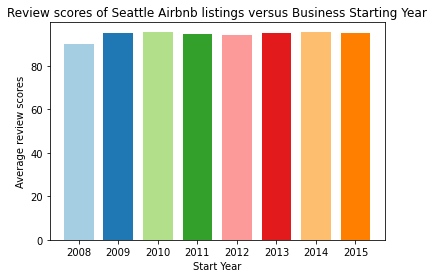

In [129]:
# Creating a bar chart with bars of different color using colormap
x=df2_review_score_versus_year ['Start Year']
y=df2_review_score_versus_year ['review_scores_rating']
plt.bar(x, y, width=0.7, color=col_map.colors, edgecolor=col_map.colors, linewidth=2)
plt.title('Review scores of Seattle Airbnb listings versus Business Starting Year')
plt.xlabel('Start Year')
plt.ylabel('Average review scores')
plt.savefig('Review scores of Seattle Airbnb listings versus Business Starting Year.png')
plt.show()

From the chart, it is hard to tell if there are any differences in review scores over the business starting year. Except, the listings started since 2008 have the lowest average review scores. So the review scores might not be a key factor.

3. Explore the average price over the business starting year

In [139]:
#explore the listing price vs starting year
df2_newlisting_price_versus_year = df_3.groupby('Start Year')['price'].mean().reset_index()
df2_newlisting_price_versus_year


,Start Year,price
0,2008,79.500000
1,2009,125.750000
2,2010,144.167785
3,2011,140.510050
4,2012,124.920223
5,2013,129.563144
6,2014,127.360000
7,2015,122.049949
8,2016,53.200000


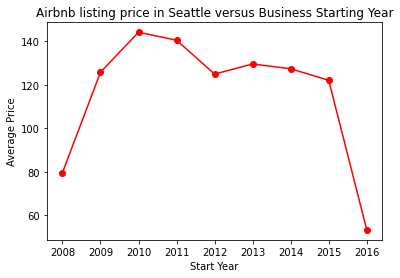

In [140]:
#generating the overall trend for price versus starting year
fig,ax = plt.subplots()
x=df2_newlisting_price_versus_year['Start Year']
y=df2_newlisting_price_versus_year['price']
xticks=df2_newlisting_price_versus_year['Start Year']
ax.plot(x,y,marker='o', color='r')
plt.xticks(xticks)
plt.xlabel('Start Year')
plt.ylabel('Average Price')
plt.title('Airbnb listing price in Seattle versus Business Starting Year')
plt.savefig('Airbnb listing price in Seattle versus Business Starting Year.png')
plt.show()

The average listing price in 2016 is the lowest. This might be a marketing strategy for new business to attract customers and build up business profiles. For listings starting from 2009 to 2015, they consolidate at the price range of $120 to $140. This is reasonable since they have complete profiles and mature business. But for listings started in 2008, it is surprised to see their price is much lower from the $120 level.

Conclusion
In this project we use the Airbnb Seattle dataset to perform some interesting exploratory data analysis:
-We explored the price pattern in both weekly and seasonal which clearly showed the price hikes in the weekend and summer time, while January is the cheapest but surprisingly the busiest month as well.
-We then looked at the neighbourhood groups in Seattle. It is founded that the Downtown area is one of the most popular areas that has more listings and more booked days but also higher price.
-Lastly we looked into the listing business history. It is surprising to see no big differences on the review scores for listings from 2009 to 2016. More surprising to see listings started in 2008 have the lowest average review scores and a low level of average price.
Hope those findings can help you to find your perfect travel lodgings in the near future!